In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv('copernicus_data.csv')
df.head()

,time,lat,lon,SPM,TUR,CHL,site
0,2022/1/1,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North
1,2022/1/2,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North
2,2022/1/3,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North
3,2022/1/4,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North
4,2022/1/5,54.664352,-1.18536,NaN,NaN,NaN,Seaton Carew North


In [3]:
df = df.dropna()
df

,time,lat,lon,SPM,TUR,CHL,site
13,2022/1/14,54.664352,-1.185360,14.042665,22.756594,4.884795,Seaton Carew North
55,2022/2/25,54.664352,-1.185360,22.437294,35.101610,14.003212,Seaton Carew North
83,2022/3/25,54.664352,-1.185360,40.151783,51.669464,10.903126,Seaton Carew North
85,2022/3/27,54.664352,-1.185360,6.892934,11.498591,6.122627,Seaton Carew North
118,2022/4/29,54.664352,-1.185360,41.126600,60.180290,11.448505,Seaton Carew North
...,...,...,...,...,...,...,...
155673,2022/7/3,50.540278,-3.501922,0.902155,1.542960,1.908623,Shaldon
155678,2022/7/8,50.540278,-3.501922,0.587033,1.005328,1.128255,Shaldon
155708,2022/8/7,50.540278,-3.501922,0.836071,1.430170,3.891465,Shaldon
156376,2022/6/6,50.995833,-4.534416,0.676724,1.158486,4.287364,Hartland Quay


In [4]:
df['site'].value_counts()

Herne Bay                    31
Southwold The Pier           25
Silloth                      25
Redcar Lifeboat Station      24
Sea Palling                  24
                             ..
Haverigg                      1
Hillhead                      1
Flamborough South Landing     1
Bovisand                      1
Silecroft                     1
Name: site, Length: 153, dtype: int64

In [5]:
mean_site = df.groupby("site").mean()
print(mean_site)

                       lat       lon        SPM        TUR        CHL
site                                                                 
Allonby          54.768056 -3.433788  18.734689  28.758752   9.604901
Allonby South    54.743981 -3.456499  51.850424  65.734083   9.798871
Amble Links      55.325463 -1.552236  32.355549  40.546083   9.070575
Bantham          50.279167 -3.879280  20.075520  31.708273   5.813027
Beachlands West  50.783796 -1.001922   4.496542   7.510976   5.712424
...                    ...       ...        ...        ...        ...
Whitby           54.492130 -0.624563  19.409718  29.723816  15.368274
Wilsthorpe       54.066204 -0.207023  55.470154  75.858110  18.188683
Winchelsea       50.906019  0.718903  34.094720  43.675681  14.587083
Worthing         50.806944 -0.385220  69.305693  82.434675   6.965893
Yaverland        50.661574 -1.132949  12.564206  19.859521   8.968518

[153 rows x 5 columns]


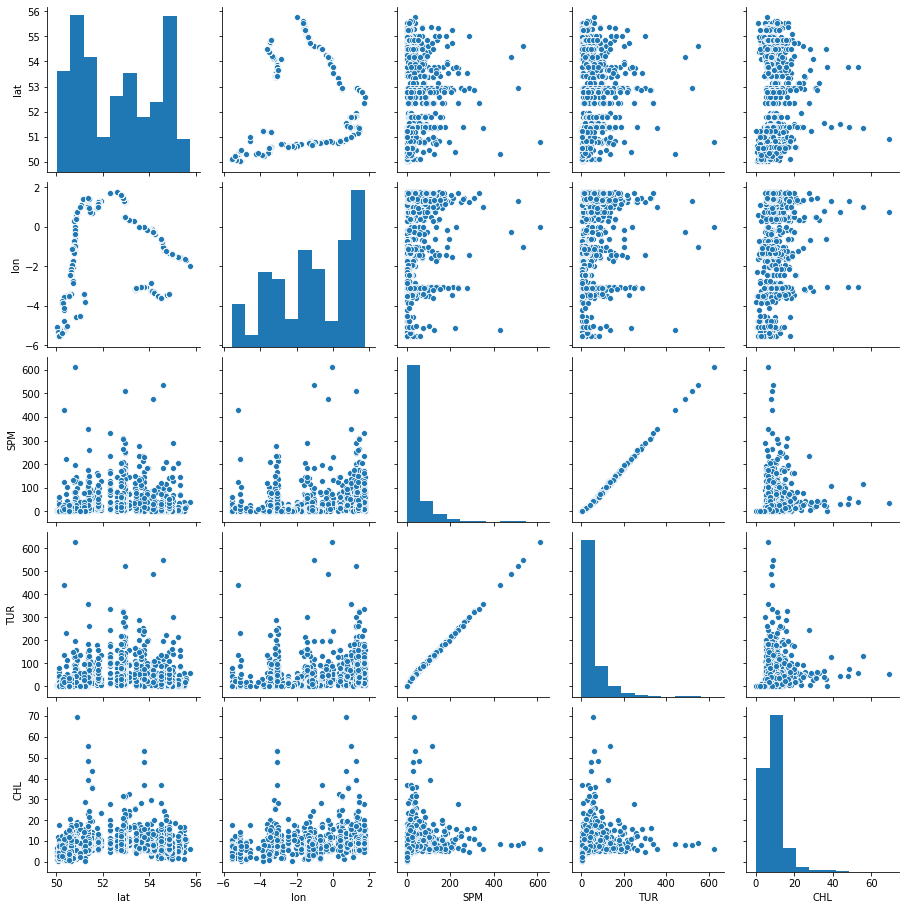

In [6]:
sns.pairplot(df[["lat", "lon", "SPM", "TUR", "CHL"]])
plt.show()

In [7]:
correlation = df[["lat", "lon", "SPM", "TUR", "CHL"]].corr()
correlation

,lat,lon,SPM,TUR,CHL
lat,1.000000,0.014016,0.087269,0.106304,0.085508
lon,0.014016,1.000000,0.204861,0.222606,0.211912
SPM,0.087269,0.204861,1.000000,0.995789,0.114889
TUR,0.106304,0.222606,0.995789,1.000000,0.145625
CHL,0.085508,0.211912,0.114889,0.145625,1.000000


In [8]:
model = sm.OLS(df["TUR"], df["SPM"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TUR   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          8.361e+04
Date:                Wed, 01 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:27:48   Log-Likelihood:                         -3926.6
No. Observations:                1093   AIC:                                      7855.
Df Residuals:                    1092   BIC:                                      7860.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SPM            1.1046      0.004    289.157      0.000       1.097       1.112
==============================================================================
Omnibus:                      580.418   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7039.879
Skew:                          -2.167   Prob(JB):                         0.00
Kurtosis:                      14.653   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""